In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
# git_repo_url = 'https://github.com/dinatih/openpose.git'
project_name = splitext(basename(git_repo_url))[0]

if 1 or not exists(project_name):
  !rm -rf openpose
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949

  print("install new CMake becaue of CUDA10")
  if not exists('cmake-3.13.0-Linux-x86_64.tar.gz'):
    !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local

  print("clone openpose")
  !git clone -q --depth 1 $git_repo_url
  print("CMakelist.txt's caffe fix")
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  print("install system dependencies")
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  print("build openpose")
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
!wget -P /content/openpose/models/pose/coco http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/coco/pose_iter_440000.caffemodel 

import os
from os.path import exists, join, basename, splitext
#video_path 
video_path = '/content/drive/MyDrive/Videos/277675141.mp4'

#output directory for json

output_json='/content/drive/MyDrive/posedetection/keypoints_from_videos_json/squat_test/'

!cd openpose && T --video '{video_path}' --model_pose COCO --write_json '{output_json}' --part_candidates --display 0 --render_pose 0


install new CMake becaue of CUDA10
clone openpose
CMakelist.txt's caffe fix
install system dependencies
Selecting previously unselected package libgflags2.2.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0

In [ ]:
!wget -P /content/openpose/models/pose/coco http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/coco/pose_iter_440000.caffemodel 


--2020-12-28 13:34:25--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/coco/pose_iter_440000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.176.37
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.176.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209274056 (200M) [text/plain]
Saving to: ‘/content/openpose/models/pose/coco/pose_iter_440000.caffemodel’

pose_iter_440000.ca 100%[===================>] 199.58M  38.2MB/s    in 6.7s    

2020-12-28 13:34:32 (29.8 MB/s) - ‘/content/openpose/models/pose/coco/pose_iter_440000.caffemodel’ saved [209274056/209274056]



FOR IMAGE POSE ESTIMATION

In [ ]:
# import os
# from os.path import exists, join, basename, splitext
# img_path = '/content/drive/MyDrive/posedetection/squats/'
# output_json='/content/drive/MyDrive/posedetection/output_json_allframes/'

# !cd openpose && ./build/examples/openpose/openpose.bin --image_dir '{img_path}' --model_pose COCO --write_json '{output_json}' --part_candidates --display 0 --render_pose 0

DOWNLOAD JSON FOLDER

In [ ]:
# import shutil
# shutil.make_archive('output_json', 'zip', '/content/openpose/output_json')

FOR VIDEO POSE ESTIMATION

In [ ]:
#for video keypoint extraction
import os
from os.path import exists, join, basename, splitext
#video_path 
video_path = '/content/drive/MyDrive/Videos/277675141.mp4'

#output directory for json

output_json='/content/drive/MyDrive/posedetection/keypoints_from_videos_json/squat_test/'

!cd openpose && ./build/examples/openpose/openpose.bin --video '{video_path}' --model_pose COCO --write_json '{output_json}' --part_candidates --display 0 --render_pose 0

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 78.546296 seconds.


In [ ]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt


In [ ]:
def GetAllAngles(runid):
    # Processes all the JSON files in a directory by calculating angles, etc.
    # Wraps getAngles

    # Get list of files
    #fileList = []
    #for file in os.listdir(dirName):
    #    if file.endswith(".json"):
    #        fileList.append(file)

    # Sort file list
    #fileList = sorted(fileList,key=lambda x: int(x[-27:-15]))

    posejson = LoadPoseJSON(runid)
    
    # Get angles, etc. for all files
    dataList   = [GetFrameAngles(posejson, frame) for frame, i in enumerate(posejson)]

    # Concatenate arrays
    angles = np.array([x["angles"] for x in dataList])
    angles_sign = np.array([x["angles_sign"] for x in dataList])
    confidence = np.array([x["confidence"] for x in dataList])
    v1s = np.array([x["v1"] for x in dataList])
    v2s = np.array([x["v2"] for x in dataList])
    posekps = np.array([x["pose_kp"] for x in dataList])
    
    # Other
    joint_labels = dataList[0]["joint_labels"]
    return {"joint_labels": joint_labels,
            "angles": angles,
            "angles_sign": angles_sign,
            "confidence": confidence,
            "v1s" : v1s,
            "v2s" : v2s,
            "pose_kps" : posekps}

In [ ]:
def GetFrameAngles(posejson, frame = 0):
    # Calculates joint angles, confidence intervals, cross-prodcut sign etc.

    # Load JSON
    #with open(fname) as json_data:
    #    data_all = json.load(json_data)

    ## AQEEL -- Now handled by GetPoseAngle

    # Get first person
    np.seterr(divide='ignore', invalid='ignore')
    data = posejson['people'][0]

    # Get pose keypoints and reshape
    pose_kp_raw = data['pose_keypoints_2d']
    pose_kp = np.array(pose_kp_raw).reshape([18,3])
    
    # Define Joints
    joint_labels=['Right elbow','Left elbow','Right Shoulder','Left Shoulder','Right Knee','Left Knee','Right Hip','Left Hip']
    joints  = [[2,3,4],[5,6,7],[3,2,5],[6,5,2],[8,9,10],[11,12,13],[11,8,9],[8,11,12]]

    # Get array of 3x3 arrays of points from pose_kp corresponding to each joint
    pose_kp_joints = np.array([pose_kp[i,0:2] for i in joints])

    # Define confidence in a joint as quadrature of confidence of each body part
    pose_kp_joints_confidence = np.array([np.sqrt(np.mean(np.square(pose_kp[i,2:3]))) for i in joints])

    # Define vectors with origin at joint
    v1 = pose_kp_joints[:,0,:]-pose_kp_joints[:,1,:]
    v2 = pose_kp_joints[:,2,:]-pose_kp_joints[:,1,:]

    # Compute joint angle
    absProb = np.multiply(np.sqrt(np.sum(np.power(v1,2),axis=1)),np.sqrt(np.sum(np.power(v2,2),axis=1)))
    angles  = np.arccos(np.divide(np.sum(np.multiply(v1,v2),axis=1),absProb))*180/np.pi

    # Compute cross product sign
    angles_sign = np.sign(np.subtract(np.multiply(v1[:,0],v2[:,1]),np.multiply(v1[:,1],v2[:,0])))

    # return {"frame": frame,
    #         "joint_labels": joint_labels,
    #         "angles": angles,
    #         "angles_sign": angles_sign,
    #         "confidence": pose_kp_joints_confidence,
    #         "v1": v1,
    #         "v2": v2,
    #         "pose_kp": pose_kp}
    return angles

In [ ]:
def angle_between_points(a, b, c):

    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

In [ ]:
#check for width and height should be multiple of 16

count_of_squats = 0
squat_pos = 0
prev_squat_pos = 0
angles_list=[]
# i = 0
for json_file in sorted(os.listdir(output_json)):
  # print(json_file)
  f=open(output_json+json_file,)
  raw_json=json.load(f)
  x=list(raw_json.items())[1][1][0]['pose_keypoints_2d']
  x=np.array(x).reshape(18,3)
  # print(x)
  f.close()
  try:
    center_11=int(x[11][0]),int(x[11][1])#left hip value
    center_12=int(x[12][0]),int(x[12][1])#left knee value
    center_13=int(x[13][0]),int(x[13][1])#left ankle value

    #check for squat
    
    squat_left_angle = int(angle_between_points(center_11, center_12, center_13))

    
    
    squat_pos = 1 if squat_left_angle <= 90 else 0
    if prev_squat_pos - squat_pos == 1:
      count_of_squats +=1

    prev_squat_pos = squat_pos

    print(squat_left_angle, squat_pos, count_of_squats)

    angles_list.append(squat_left_angle)
  except:
    pass

  

171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
171 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
172 0 0
174 0 0
174 0 0
177 0 0
173 0 0
167 0 0
159 0 0
146 0 0
137 0 0
135 0 0
131 0 0
133 0 0
133 0 0
140 0 0
147 0 0
158 0 0
166 0 0
171 0 0
174 0 0
174 0 0
171 0 0
173 0 0
172 0 0
173 0 0
174 0 0
171 0 0
168 0 0
167 0 0
165 0 0
158 0 0
158 0 0
157 0 0
162 0 0
160 0 0
154 0 0
157 0 0
161 0 0
160 0 0
164 0 0
165 0 0
166 0 0
167 0 0
172 0 0
174 0 0
176 0 0
177 0 0
178 0 0
177 0 0
176 0 0
177 0 0
176 0 0
176 0 0
176 0 0
178 0 0
179 0 0
179 0 0
175 0 0
175 0 0
175 0 0
173 0 0
173 0 0
174 0 0
175 0 0
174 0 0
174 0 0
174 0 0
173 0 0
173 0 0
173 0 0
173 0 0


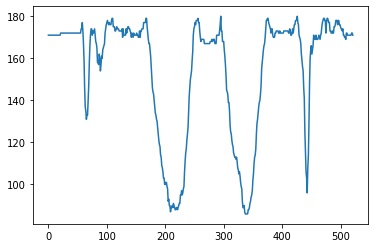

In [ ]:
plt.plot(angles_list)

In [ ]:
min(angles_list)

86

In [ ]:
output={"exercise_name":" ",
        "joints":[],
        "lowerbound":[],
        "upperbound":[],
        "midpoint":[],
        "max_target":[],
        "min_target":[],
        "act_max_target":[],
        "act_min_target":[],
        "angle_sign":,
        "similarity":,
        "repcount":int(count_of_squats),
        "frame_number":
        }